In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("AmazonSaleReport.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [54]:
df.isnull().sum()/len(df)

index                 0.0
Order ID              0.0
Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Category              0.0
Size                  0.0
Courier Status        0.0
Qty                   0.0
currency              0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
ship-country          0.0
B2B                   0.0
Month                 0.0
dtype: float64

In [10]:
#columns new,pendings and fulfilled-by are having more the 50% of null values so deleted those columns

df.drop(columns=['New','PendingS'],inplace=True)

In [11]:
df.drop(columns=['fulfilled-by'],inplace=True)

In [12]:
df.duplicated().sum() 

168

In [13]:
# 168 duplicates was deleted.
df.drop_duplicates(inplace=True)

In [14]:
#dropping the rows which the columns having less than 6% of missing values

df.dropna(inplace=True)

In [55]:
#Sales Overview


daily_sales=df.groupby('Date')['Amount'].sum()
daily_sales

Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
                 ...    
2022-06-25     654234.58
2022-06-26     773610.02
2022-06-27     714124.67
2022-06-28     772085.53
2022-06-29     411530.76
Name: Amount, Length: 91, dtype: float64

Text(0, 0.5, 'Amount')

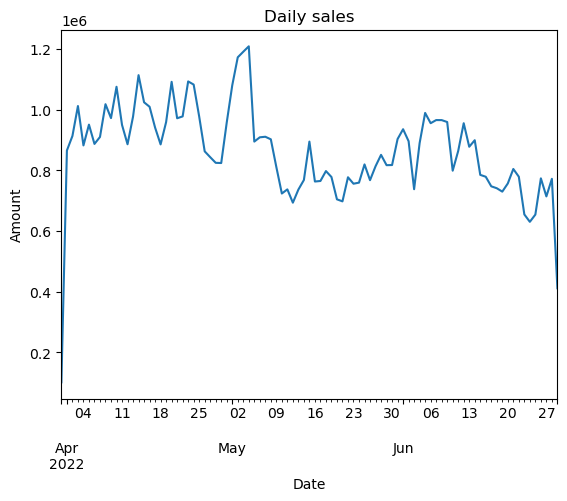

In [56]:
daily_sales.plot()
plt.title("Daily sales")
plt.xlabel("Date")
plt.ylabel('Amount')

In [57]:
df['Month']=df['Date'].dt.month
df['Month']

0         4
1         4
2         4
3         4
4         4
         ..
128971    5
128972    5
128973    5
128974    5
128975    5
Name: Month, Length: 120988, dtype: int32

In [ ]:
monthly_sales=df.groupby('Month')['Amount'].sum()
monthly_sales.plot()
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel('Amount')

#### * Daily and monthly sales show varying trends, with peaks and troughs throughout the observed period.
#### * Monthly sales peaked in April and gradually declined through May and June.

##### Product Analysis:Analyze the distribution of product categories, sizes, and quantities sold to idendtify popular products.

In [60]:
df['Category'].value_counts()

Category
T-shirt     46969
Shirt       46628
Blazzer     14693
Trousers    10149
Perfume      1091
Wallet        881
Socks         419
Shoes         155
Watch           3
Name: count, dtype: int64

In [61]:
df['Size'].value_counts()

Size
M       20942
L       20452
XL      19391
XXL     16764
S       15624
3XL     13869
XS      10179
Free     2130
6XL       705
5XL       526
4XL       406
Name: count, dtype: int64

In [62]:
df.groupby('Category')['Qty'].sum()

# popular products are T-shirt and Shirt

Category
Blazzer     13929
Perfume      1051
Shirt       44889
Shoes         152
Socks         397
T-shirt     45153
Trousers     9883
Wallet        844
Watch           3
Name: Qty, dtype: int64

#### * Popular Products: T-shirts and Shirts are the most popular categories in terms of both sales quantity and revenue.
#### * Sizes: Medium (M) and Large (L) sizes are the most frequently sold

##### Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.

In [63]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      83524
Merchant    37464
Name: count, dtype: int64

In [64]:
df['Courier Status'].value_counts()

Courier Status
Shipped       109315
Unshipped       6549
On the Way      5124
Name: count, dtype: int64

In [16]:
a=df.groupby('Courier Status')['Status'].apply(lambda x: (x == 'Shipped - Delivered to Buyer').sum() / len(x))
a

Courier Status
On the Way    0.000000
Shipped       0.262544
Unshipped     0.000000
Name: Status, dtype: float64

<Axes: xlabel='Courier Status'>

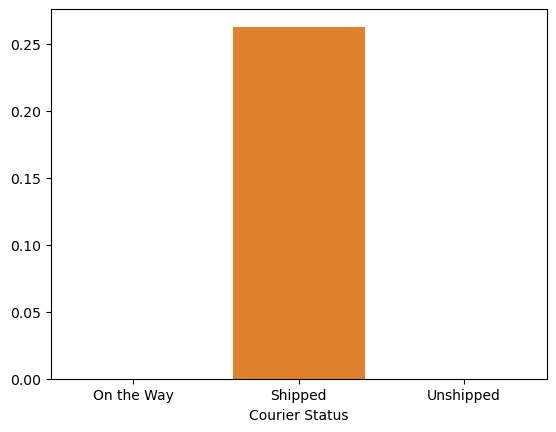

In [23]:
sns.barplot(x=a.index,y=a.values)

#### * Majority of orders are fulfilled by Amazon.
#### * Most orders are shipped and delivered, with a small percentage remaining unshipped.

##### Customer Segmentation: Segment customers based on their buying behaviour, location, and other relevant factors.

In [25]:
customer_segments = df.groupby(['ship-city', 'ship-state', 'ship-country']).size().reset_index(name='Order Count')

customer_segments


,ship-city,ship-state,ship-country,Order Count
0,(Chikmagalur disterict). (N.R pur thaluku),KARNATAKA,IN,1
1,"(Via Cuncolim)Quepem,South Goa",GOA,IN,1
2,",HYDERABAD",TELANGANA,IN,1
3,",raibarely road faizabad (Ayodhya)",UTTAR PRADESH,IN,1
4,..katra,JAMMU & KASHMIR,IN,1
...,...,...,...,...
8880,yavatmal,MAHARASHTRA,IN,1
8881,yazali,ARUNACHAL PRADESH,IN,1
8882,yellapur,KARNATAKA,IN,1
8883,zirakpur,PUNJAB,IN,1


In [27]:

category_segments = df.groupby('Category')['Qty'].sum().reset_index(name='Total Quantity Sold')

In [28]:
category_segments

,Category,Total Quantity Sold
0,Blazzer,13929
1,Perfume,1051
2,Shirt,44889
3,Shoes,152
4,Socks,397
5,T-shirt,45153
6,Trousers,9883
7,Wallet,844
8,Watch,3


##### Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities.

In [30]:
state=df['ship-state'].value_counts()
state

ship-state
MAHARASHTRA               21048
KARNATAKA                 16364
TAMIL NADU                10796
TELANGANA                 10626
UTTAR PRADESH              9943
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
PB                            1
Name: count, Length: 68, dtype: int64

<Axes: xlabel='ship-state'>

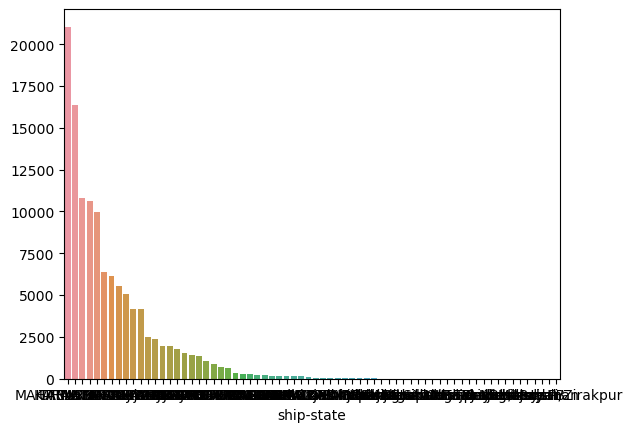

In [31]:
sns.barplot(x=state.index,y=state.values)

In [33]:
city=df['ship-city'].value_counts()
city


ship-city
BENGALURU                           10659
HYDERABAD                            7599
MUMBAI                               5856
NEW DELHI                            5439
CHENNAI                              5130
                                    ...  
Mettur, Salem                           1
Irakasandra                             1
Caranzalem - Tiswadi                    1
Venjarammoodu,thiruvananthapuram        1
Halol                                   1
Name: count, Length: 8697, dtype: int64

#### * States: Maharashtra, Karnataka, and Tamil Nadu are the top states in terms of sales volume.
#### * Cities: Bengaluru, Hyderabad, and Mumbai are the cities with the highest number of orders.

Recommendation

Sales Strategies:

Promotions: Offer discounts or bundle deals on T-shirts and Shirts to boost sales.

Targeted Marketing: Use targeted advertising campaigns on social media and search engines, focusing on popular product categories and high-sales cities.
Inventory Management:

Demand Forecasting: Implement predictive analytics to better anticipate demand for different sizes and categories.
Stock Optimization: Adjust inventory levels to ensure availability of popular products and sizes, especially during peak sales periods.
Customer Service:

Delivery Optimization: Collaborate with Amazon to streamline shipping and delivery processes further to reduce unshipped orders.
Feedback Mechanism: Implement a customer feedback system to monitor and improve delivery satisfaction.

conclusion:
    The analysis of your Amazon sales report reveals clear opportunities to optimize sales strategies and enhance customer satisfaction. Focusing on popular products like T-shirts and Shirts, targeting promotions during peak sales periods, and improving delivery efficiency are recommended. By leveraging these insights and recommendations, your business can drive revenue growth and maintain competitive advantage in the e-commerce market.